In [75]:
#NDTA631 - Group Assignment
# Member: Kgothatso Mohande
#Task: Visualisation

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df1_clean = pd.read_csv("../datasets/cleaned_dataset1.csv")
df2_clean = pd.read_csv("../datasets/cleaned_dataset2.csv")

print("Datasets loaded successfully.\n")
print("Dataset 1 shape:", df1_clean.shape)
print("Dataset 2 shape:", df2_clean.shape)

print("\n=== Numerical Analysis Section ===")

arr1 = df1_clean["OBS_VALUE"].to_numpy()
arr2 = df2_clean["OBS_VALUE"].to_numpy()


arr1_reshaped = arr1.reshape(-1, 1)
arr2_reshaped = arr2.reshape(-1, 1)

print("\nArray shapes after reshaping:")
print("Dataset 1 shape:", arr1_reshaped.shape)
print("Dataset 2 shape:", arr2_reshaped.shape)


print("\nDataset 1 (Financial Institution Accounts) statistics:")
print("Mean:", np.mean(arr1).round(2))
print("Median:", np.median(arr1).round(2))
print("Standard Deviation:", np.std(arr1).round(2))

print("\nDataset 2 (Mobile Accounts) statistics:")
print("Mean:", np.mean(arr2).round(2))
print("Median:", np.median(arr2).round(2))
print("Standard Deviation:", np.std(arr2).round(2))


min_len = min(len(arr1), len(arr2))
added = arr1[:min_len] + arr2[:min_len]
subtracted = arr1[:min_len] - arr2[:min_len]
multiplied = arr1[:min_len] * arr2[:min_len]

print("\nArray Operations (first 5 values):")
print("Addition:", added[:5])
print("Subtraction:", subtracted[:5])
print("Multiplication:", multiplied[:5])




Datasets loaded successfully.

Dataset 1 shape: (35, 7)
Dataset 2 shape: (46, 7)

=== Numerical Analysis Section ===

Array shapes after reshaping:
Dataset 1 shape: (35, 1)
Dataset 2 shape: (46, 1)

Dataset 1 (Financial Institution Accounts) statistics:
Mean: 18.49
Median: 17.06
Standard Deviation: 8.95

Dataset 2 (Mobile Accounts) statistics:
Mean: 24.72
Median: 22.9
Standard Deviation: 10.76

Array Operations (first 5 values):
Addition: [24.55307608 46.63050172 57.37535624 42.76522373 24.20145583]
Subtraction: [ -4.30328427   8.59680984 -15.75525879 -20.48117961  -5.85777888]
Multiplication: [146.08382236 525.12463783 760.92583095 352.34641057 137.84922271]



===3. VISUALISATION ===


C:\Users\Admin\AppData\Local\Temp\ipykernel_2184\3907216157.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


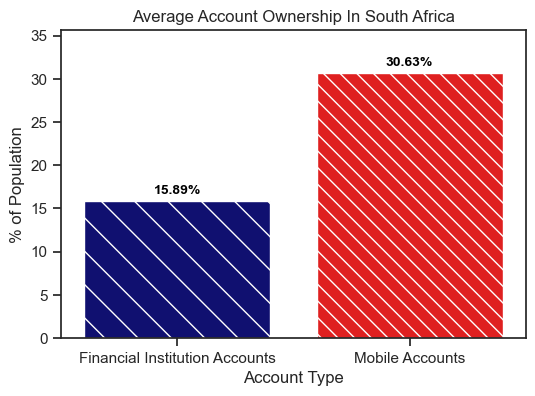


=== Explanation ===
-The bar graph shows the average percentage of South Africans aged 15 and above, who owns Financial Institution Accounts and Mobile Accounts.
-According to the bar chart, mobile account ownership (24.27%) is higher than financial institution account ownership (18.49%).
-This aligns with the numerical analysis made, where the mean value of mobile accounts indicates higher overall adoption.


In [76]:

print("\n===3. VISUALISATION ===")
#3.1 Bar chart showing the average percentage of people (15+) with Mobile accounts vs Financial institution accounts.

plt.figure(figsize=(6,4))
bars = sns.barplot(
    x=["Financial Institution Accounts", "Mobile Accounts"],
    y=[df["Financial_Acc"].mean(), df["Mobile_Acc"].mean()],
    palette=["navy", "red"]
)

for i, bar in enumerate(bars.patches):
    value = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,  
        value + 0.5,                     
        f"{value:.2f}%",                  
        ha="center", va="bottom", color="black", fontsize=10, fontweight="bold")



plt.title("Average Account Ownership In South Africa")
plt.ylabel("% of Population")
plt.xlabel("Account Type")
plt.ylim(0, max(df["Financial_Acc"].mean(), df["Mobile_Acc"].mean()) + 5)
bars.patches[0].set_hatch("\\")
bars.patches[1].set_hatch("\\\\")
plt.show()

print("\n=== Explanation ===")
print("-The bar graph shows the average percentage of South Africans aged 15 and above, who owns Financial Institution Accounts and Mobile Accounts.")
print("-According to the bar chart, mobile account ownership (24.27%) is higher than financial institution account ownership (18.49%).")
print("-This aligns with the numerical analysis made, where the mean value of mobile accounts indicates higher overall adoption.")




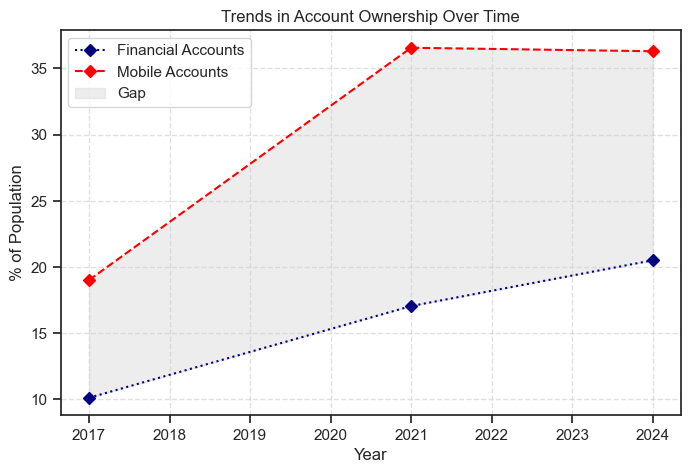


=== Explanation ===
-The line chart shows the trend of financial account ownership vs mobile account ownership over the years. 
-Both types of accounts are growing, but the difference between the rates of adoption is emphasized by the shaded area between the two lines.
-The chart emphasizes that the adoption of mobile accounts is always increasing faster than the financial institution accounts over a period of time.
-This is the results of the subtraction in the numerical analysis which estimated the difference between both account types.


In [77]:
#3.2 A Line chart showing how account ownership changed over time
df["TIME_PERIOD"] = df["TIME_PERIOD"].astype(int)
df = df.sort_values("TIME_PERIOD").drop_duplicates("TIME_PERIOD")

plt.figure(figsize=(8,5))
plt.plot(df["TIME_PERIOD"], df["Financial_Acc"], marker="D", linestyle=":", color="navy", label="Financial Accounts")
plt.plot(df["TIME_PERIOD"], df["Mobile_Acc"], marker="D", linestyle="--", color="red", label="Mobile Accounts")

plt.fill_between(
    df["TIME_PERIOD"],
    df["Financial_Acc"],
    df["Mobile_Acc"],
    color="lightgrey", alpha=0.4, label="Gap"
)

plt.title("Trends in Account Ownership Over Time")
plt.xlabel("Year")
plt.ylabel("% of Population")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

print("\n=== Explanation ===")
print("-The line chart shows the trend of financial account ownership vs mobile account ownership over the years. ")
print("-Both types of accounts are growing, but the difference between the rates of adoption is emphasized by the shaded area between the two lines.")
print("-The chart emphasizes that the adoption of mobile accounts is always increasing faster than the financial institution accounts over a period of time.")
print("-This is the results of the subtraction in the numerical analysis which estimated the difference between both account types.")



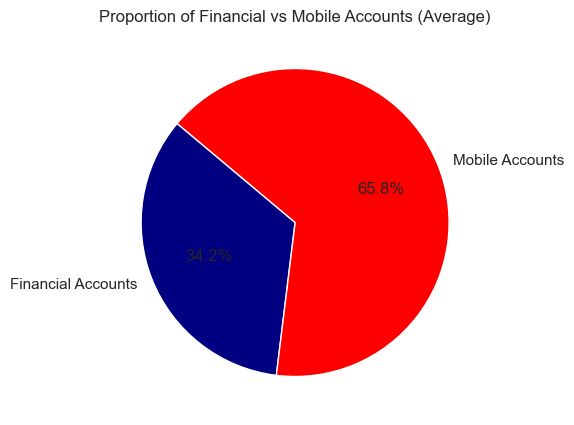


=== Explanation ===
-The pie chart shows the average proportion of people who own financial institution accounts vs Mobile accounts in South Africa.
-Mobile accounts take up a greater proportion of the total account ownership, which fits the numerical analysis result that the average percentage of mobile accounts (24.72) is greater than the one of financial institution accounts (18.49).


In [78]:
#3.3 Pie chart showing the average proportion of people who own financial institution accounts vs Mobile accounts in South Africa.
labels = ["Financial Accounts", "Mobile Accounts"]
sizes = [df["Financial_Acc"].mean(), df["Mobile_Acc"].mean()]
colors = ["navy", "red"]

plt.figure(figsize=(5,5))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=140, colors=colors)
plt.title("Proportion of Financial vs Mobile Accounts (Average)")
plt.show()

print("\n=== Explanation ===")
print("-The pie chart shows the average proportion of people who own financial institution accounts vs Mobile accounts in South Africa.")
print("-Mobile accounts take up a greater proportion of the total account ownership, which fits the numerical analysis result that the average percentage of mobile accounts (24.72) is greater than the one of financial institution accounts (18.49).")


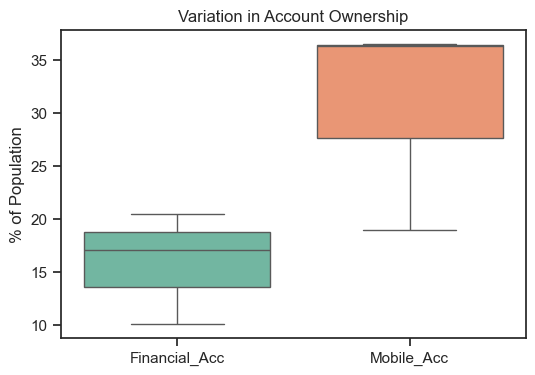


=== Explanation ===
-The box plot indicates the distribution and spreads of financial institution accounts and mobile accounts.
-The mobile accounts (10.76) are spread wider, which is consistent with their higher standard deviation than financial institution accounts (8.95)
-This shows that the adoption of mobile accounts is not among various groups or years, with a certain time frame showing higher adoption rate.
-Financial institution accounts are more stable but with low adoption levels.
-The findings support the numerical analysis by indicating how account ownership would improve.


In [79]:
#3.4 Box plot showing the distribution and spreads of financial institution accounts and mobile accounts.
plt.figure(figsize=(6,4))
sns.boxplot(data=df[["Financial_Acc", "Mobile_Acc"]], palette="Set2")
plt.title("Variation in Account Ownership")
plt.ylabel("% of Population")
plt.show()
print("\n=== Explanation ===")
print("-The box plot indicates the distribution and spreads of financial institution accounts and mobile accounts.")
print("-The mobile accounts (10.76) are spread wider, which is consistent with their higher standard deviation than financial institution accounts (8.95)")
print("-This shows that the adoption of mobile accounts is not among various groups or years, with a certain time frame showing higher adoption rate.")
print("-Financial institution accounts are more stable but with low adoption levels.")
print("-The findings support the numerical analysis by indicating how account ownership would improve.")